In [11]:
from pathlib import Path

import numpy as np

import starfile
from color_palette import *

- **rlnFourierShellCorrelationCorrected** = Final FSC value: i.e. after correction based on masking of randomized-phases maps
- **rlnFourierShellCorrelationParticleMaskFraction** = CisTEM-like correction of unmasked FSCs, based on fraction of white pixels in solvent mask
- **rlnFourierShellCorrelationUnmaskedMaps** = FSC value before masking of the original maps
- **rlnFourierShellCorrelationMaskedMaps** = FSC value after masking of the original maps
- **rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps** = FSC value after masking of the randomized-phases maps

Final resolution: 19.58 Å
Randomise from: 26.49 Å


/tmp/ipykernel_1134766/1253416785.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsc_data["rlnResolution"] = fsc_data["rlnResolution"] * binning


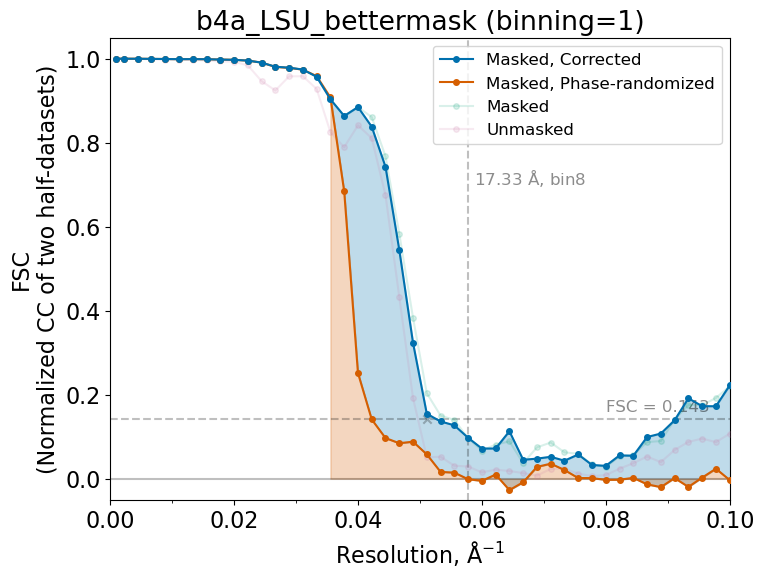

In [53]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

input_postprocess_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/b4a_LSU_bettermask/postprocess.star")
data = starfile.read(input_postprocess_star)
fsc_data = data["fsc"][[
    "rlnResolution",
    "rlnFourierShellCorrelationCorrected",
    "rlnFourierShellCorrelationUnmaskedMaps",
    "rlnFourierShellCorrelationMaskedMaps",
    "rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"
]]
general_data = data["general"]
final_resolution = general_data["rlnFinalResolution"].values[0]
print(f"Final resolution: {final_resolution:.2f} Å")
randomise_from = general_data["rlnRandomiseFrom"].values[0]
print(f"Randomise from: {randomise_from:.2f} Å")

binning = 1
fsc_data["rlnResolution"] = fsc_data["rlnResolution"] * binning
fsc_data.set_index("rlnResolution", inplace=True)
x_data = fsc_data.index

y_data_list = [
    fsc_data["rlnFourierShellCorrelationCorrected"],
#    fsc_data["rlnFourierShellCorrelationParticleMaskFraction"],
    fsc_data["rlnFourierShellCorrelationUnmaskedMaps"],
    fsc_data["rlnFourierShellCorrelationMaskedMaps"],
    fsc_data["rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"],
]


low_alpha = 0.15
linestyle = "-"
linewidth = 1.5
markerstyle = "."
markersize = 8
ax.plot(x_data, y_data_list[0], 
        label="Masked, Corrected",
        color=color_palette()[0],
        alpha=1.0,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=10,
        )
ax.plot(x_data, y_data_list[3], 
        label="Masked, Phase-randomized",
        color=color_palette()[1],
        alpha=1.0,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=9,
        )
ax.plot(x_data, y_data_list[2], 
        label="Masked",
        color=color_palette()[2],
        alpha=low_alpha,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=8,
        )
ax.plot(x_data, y_data_list[1], 
        label="Unmasked",
        color=color_palette()[3],
        alpha=low_alpha,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=7,
        )
#ax.plot(x_data, y_data_list[1], 
#        label="rlnFourierShellCorrelationParticleMaskFraction",
#        linestyle="dashed",
#        linewidth=linewidth,
#        #color="black",
#        )

alpha = 0.25
resolution = 1/randomise_from
start_index = np.where(x_data > resolution)[0][0]
ax.fill_between(
    x_data[start_index-1:],
    y_data_list[0].iloc[start_index-1:],
    y_data_list[3].iloc[start_index-1:],
    color=color_palette()[0],
    alpha=alpha,
)
ax.fill_between(
    x_data[start_index-1:],
    0,
    y_data_list[3].iloc[start_index-1:],
    color=color_palette()[1],
    alpha=alpha,
)
x_min = np.max(x_data)
x_max = np.min(x_data)
#ax.set_xlim(
#    xmin=-0.001,
#    xmax = 0.2,
#    )
ax.set_ylim(
    ymin=-0.1,
    ymax=1.1,
    )   


font_size = 12

ax.scatter(1/final_resolution, 0.143, marker="x", color="black", alpha=alpha)
ax.hlines(0, 0, 0.1, colors="k", linestyles="-", alpha=alpha)
ax.hlines(0.143, 0, 0.1, colors="k", linestyles="--", alpha=alpha)
ax.annotate(xy=(0.1-0.02, 0.16), text="FSC = 0.143", alpha=alpha+0.2, fontsize=font_size)
resolution = 17.33 # Angstroms
ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin8", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
resolution = 8.66 # Angstroms
ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin4", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
resolution = 6.495 # Angstroms
ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin3", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
ax.set_xlabel(r"Resolution, $\mathrm{\AA}^{-1}$")
ax.set_ylabel("FSC\n(Normalized CC of two half-datasets)")

ax.set_title(f"{input_postprocess_star.parent.name} (binning={binning})")
ax.set(
    xlim=(0, 0.1),
    ylim=(-0.05, 1.05),
)

ax.xaxis.set_major_locator(MultipleLocator(0.02))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))

plt.legend(fontsize=12)